In [1]:
using MAT
B = matread("Bwedge.mat")["B"];
eigval_true =  matread("Bwedge.mat")["B_eigvals"];

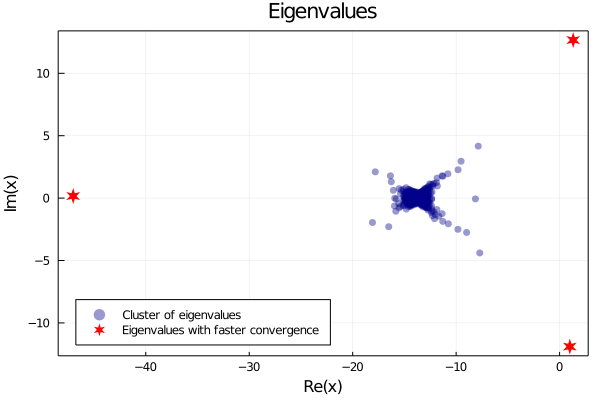

In [12]:
using Statistics

eigval = eigval_true[:]
mean_eigval = mean(eigval)
std_eigval = std(eigval)

distance_eigval = abs.(eigval .- mean_eigval)
good_eigval = eigval[distance_eigval .> 5*std_eigval]

using Plots
gr()
plot(eigval, 
    seriestype = :scatter, title = "Eigenvalues",
    framestyle = :box,
    markercolor="darkblue", markeralpha=0.4, markerstrokewidth=0.0,
    label="Cluster of eigenvalues")

plot!(good_eigval, seriestype = :scatter, 
        markercolor="red", markershape=:star6, markerstrokewidth=0.0, markersize=8,
        label="Eigenvalues with faster convergence",
        legend=:bottomleft)

We know that

$\epsilon_1^{(m)} \leq \left( \frac{\rho}{|\lambda_1 - c| \right)^{m-1} $

In [39]:
using LinearAlgebra, Random, MatrixDepot

function arnoldi(A, b, m)
    
    n = length(b);
    Q = zeros(n, m+1);
    H = zeros(m+1, m);
    Q[:,1] = b / norm(b);
    
    for k=1:m
        w = A*Q[:,k];
        h, beta, z = DGS(Q, w, k);
        H[1:(k+1), k] = [h; beta];
        Q[:, k+1] = z/beta;
    end
    
    E = eigen(H[1:end-1,:]);
    eigval = E.values;
    return eigval
end

function inv_arnoldi(A, b, m)
    
    n = length(b);
    Q = zeros(ComplexF64, n, m+1);
    H = zeros(ComplexF64, m+1, m);
    Q[:,1] = b / norm(b);
    
    for k=1:m
        w = A\Q[:,k];
        h, beta, z = DGS(Q, w, k);
        H[1:(k+1), k] = [h; beta];
        Q[:, k+1] = z/beta;
    end
    
    E = eigen(H[1:end-1,:]);
    eigval = E.values;
    return eigval
end

function DGS(Q, b, k)
    Q = Q[:,1:k];
    
    h = Q'*b;
    z = b - Q*h;
    
    g = Q'*z;
    z = z - Q*g;
    
    h = h + g;
    
    return h, norm(z), z
end
    

DGS (generic function with 1 method)

In [85]:
using Random

sigma = -9.8 + 1.5im

A = B-sigma*I;

m = 50;

Random.seed!(0)
b = randn(size(A)[1], 1)

eigval = inv_arnoldi(A, b, m);
transf_eigval = 1/eigval .+ sigma
transf_eigval = dropdims(transf_eigval, dims=1);

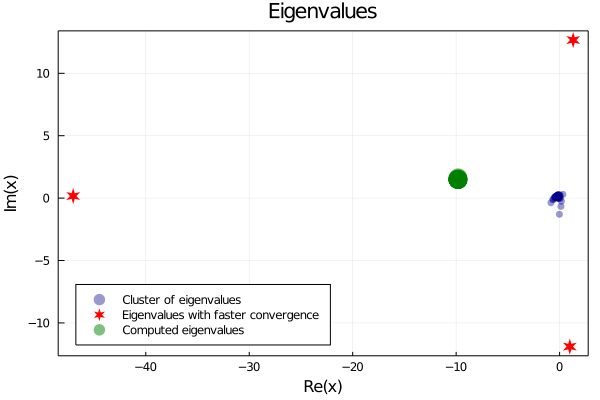

In [86]:
plot(eigval, 
    seriestype = :scatter, title = "Eigenvalues",
    framestyle = :box,
    markercolor="darkblue", markeralpha=0.4, markerstrokewidth=0.0,
    label="Cluster of eigenvalues")

plot!(good_eigval, seriestype = :scatter, 
        markercolor="red", markershape=:star6, markerstrokewidth=0.0, markersize=8,
        label="Eigenvalues with faster convergence",
        legend=:bottomleft)

plot!(transf_eigval, 
    seriestype = :scatter, title = "Eigenvalues",
    framestyle = :box,
    markercolor="green", markeralpha=0.5, markerstrokewidth=0.0, markersize=10,
    label="Computed eigenvalues")

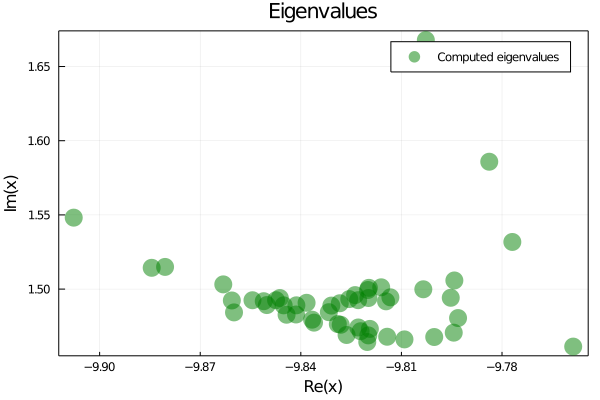

In [87]:
plot(transf_eigval, 
    seriestype = :scatter, title = "Eigenvalues",
    framestyle = :box,
    markercolor="green", markeralpha=0.5, markerstrokewidth=0.0, markersize=10,
    label="Computed eigenvalues")

In [95]:
errors = []
for (idx, computed_eigval) in enumerate(transf_eigval)
    append!(errors, minimum(abs.(eigval_true .- computed_eigval)))
end

error = minimum(errors)
errors

50-element Array{Any,1}:
 0.7283273623802794
 0.7592991370544542
 0.7583325766709417
 0.7687116036616227
 0.7793738305989648
 0.7873531956807566
 0.7788621599385177
 0.7793328558849814
 0.7818852214402859
 0.7784858985054978
 0.7769749010121126
 0.7818494163431784
 0.7881326649612767
 ⋮
 0.7757626573606518
 0.8041247574989954
 0.7703977020826579
 0.6024690366814894
 0.8026018098749215
 0.776266708259849
 0.7997764125821001
 0.764621606765818
 0.789961109280631
 0.6849835389265788
 0.739311358124962
 0.8107498324375528

In [98]:
sigma = -9.8 + 1.5im

A = B-sigma*I;
Random.seed!(0)

m = 50;

ERRORS = [];

ms = [5, 10, 20, 40, 50]
for (idx, m) in enumerate(ms)
    b = randn(size(A)[1], 1)

    eigval = inv_arnoldi(A, b, m);
    transf_eigval = 1/eigval .+ sigma
    transf_eigval = dropdims(transf_eigval, dims=1);
    
    errors = []
    for (idx, computed_eigval) in enumerate(transf_eigval)
        append!(errors, minimum(abs.(eigval_true .- computed_eigval)))
    end

    error = minimum(errors)
    append!(ERRORS, error)
end

In [99]:
ERRORS

5-element Array{Any,1}:
 0.2941073182925415
 0.4495108897018695
 0.5250043383853411
 0.5839011579698301
 0.6025273062161877